In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\shairozs\\Documents\\Projects\\HSIC_Bottleneck-Pytorch\\Outputs'

### Read Data
----------

In [2]:
df = pd.read_csv('../Notebooks/results_compiled.csv', )
#DATASET = 'MNIST'
#df = df[df.Dataset == DATASET]
#df = df[df.Backprop == 'backprop']
df.head()
print(df.shape)

(1144, 19)


## Clean Up and Adding Derived Columns
---------

In [3]:
df['ModelType'].unique()

array(['kan_2layers', 'kan_3layers', 'kan_4layers', 'mlpWide_2layers',
       'mlpWide_3layers', 'mlpWide_4layers', 'mlp_2layers', 'mlp_3layers',
       'mlp_4layers'], dtype=object)

In [4]:


df['Optimizer'] = pd.Series([x for x in df.Optimizer])
df['ModelType'] = df['Model'] + "_" + df['Num_layers']
df['Efficiency'] = (df['Best_test'] / (df['Best_test_at'] + 1))*np.sqrt((1e9 - df['Num_parameters']))

df.sort_values('Best_test')[df.ModelType == 'kan_4layers']


C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_17688\1345312062.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values('Best_test')[df.ModelType == 'kan_4layers']


,Unnamed: 0,Dataset,Backprop,Model,Num_layers,Batchsize,LearningRate,TotalEpochs,Num_parameters,Optimizer,Best_train,Best_test,Best_test_at,Avg_time,Initialization,AvgGenError,ModelType,ID,Efficiency
878,878,MNIST,backprop,kan,4layers,4096,0.0500,4,1109120,SGDM,0.099139,0.096924,0,7.391545,kaiming_uniform,0.002157,kan_4layers,750,3063.300425
877,877,MNIST,backprop,kan,4layers,4096,0.0500,4,1109120,SGD,0.098842,0.096924,0,7.381116,kaiming_uniform,0.001616,kan_4layers,750,3063.300425
876,876,MNIST,backprop,kan,4layers,4096,0.0500,4,1109120,Adam,0.099016,0.096924,0,7.469606,kaiming_uniform,0.001802,kan_4layers,750,3063.300425
869,869,MNIST,backprop,kan,4layers,4096,0.0050,4,1109120,SGDM,0.099121,0.096924,0,7.558192,kaiming_uniform,0.002029,kan_4layers,750,3063.300425
868,868,MNIST,backprop,kan,4layers,4096,0.0050,4,1109120,SGD,0.098964,0.096924,0,7.412423,kaiming_uniform,0.001912,kan_4layers,750,3063.300425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,866,MNIST,backprop,kan,4layers,4096,0.0050,98,1109120,SGD,0.995414,0.954590,2,8.625593,kaiming_uniform,0.040675,kan_4layers,750,10056.678744
857,857,MNIST,backprop,kan,4layers,4096,0.0005,98,1109120,SGD,0.999529,0.954712,3,9.728989,kaiming_uniform,0.044924,kan_4layers,750,7543.473491
853,853,MNIST,backprop,kan,4layers,4096,0.0005,98,1109120,Adam,0.999512,0.955566,37,8.791175,kaiming_uniform,0.044443,kan_4layers,750,794.760543
872,872,MNIST,backprop,kan,4layers,4096,0.0500,98,1109120,SGDM,0.982526,0.967651,48,8.456846,kaiming_normal,0.006332,kan_4layers,750,624.139775


In [5]:
df.loc[((df['ModelType'] == 'mlpWide_2layers') & (df['Dataset'] == 'CIFAR')), 'Num_parameters'] =  78676490
df.loc[((df['ModelType'] == 'mlpWide_3layers') & (df['Dataset'] == 'CIFAR')), 'Num_parameters'] =  170442250
df.loc[((df['ModelType'] == 'mlpWide_4layers') & (df['Dataset'] == 'CIFAR')), 'Num_parameters'] =  380188170

df.loc[((df['ModelType'] == 'mlpWide_2layers') & (df['Dataset'] == 'MNIST')), 'Num_parameters'] = 255050
df.loc[((df['ModelType'] == 'mlpWide_3layers') & (df['Dataset'] == 'MNIST')), 'Num_parameters'] = 712650
df.loc[((df['ModelType'] == 'mlpWide_4layers') & (df['Dataset'] == 'MNIST')), 'Num_parameters'] = 2037450

df.loc[((df['ModelType'] == 'mlpWide_2layers') & (df['Dataset'] == 'higgs')), 'Num_parameters'] = 729602
df.loc[((df['ModelType'] == 'mlpWide_3layers') & (df['Dataset'] == 'higgs')), 'Num_parameters'] = 14568962
df.loc[((df['ModelType'] == 'mlpWide_4layers') & (df['Dataset'] == 'higgs')), 'Num_parameters'] = 68462082


df.loc[((df['ModelType'] == 'mlpWide_2layers') & (df['Dataset'] == 'Fashion')), 'Num_parameters'] = 255050
df.loc[((df['ModelType'] == 'mlpWide_3layers') & (df['Dataset'] == 'Fashion')), 'Num_parameters'] = 712650
df.loc[((df['ModelType'] == 'mlpWide_4layers') & (df['Dataset'] == 'Fashion')), 'Num_parameters'] = 2037450

df.loc[((df['ModelType'] == 'mlpWide_2layers') & (df['Dataset'] == 'IMDB')), 'Num_parameters'] = 729602
df.loc[((df['ModelType'] == 'mlpWide_3layers') & (df['Dataset'] == 'IMDB')), 'Num_parameters'] = 14568962
df.loc[((df['ModelType'] == 'mlpWide_4layers') & (df['Dataset'] == 'IMDB')), 'Num_parameters'] = 68462082

In [6]:
df['Best_test'] = df['Best_test'].astype('float32')
df = df[df['Best_test'] <= 1]
df = df[df['Best_train'] <= 1]

In [7]:
df.Dataset.unique(), df.ModelType.unique()

(array(['CIFAR', 'Fashion', 'higgs', 'IMDB', 'MNIST'], dtype=object),
 array(['kan_2layers', 'kan_3layers', 'kan_4layers', 'mlpWide_2layers',
        'mlpWide_3layers', 'mlpWide_4layers', 'mlp_2layers', 'mlp_3layers',
        'mlp_4layers'], dtype=object))

In [8]:
df[df.Dataset == 'IMDB'][['Num_parameters', 'ModelType']].groupby('ModelType').mean()

,Num_parameters
ModelType,
kan_2layers,35026.4
kan_3layers,87634.4
kan_4layers,233810.4
mlpWide_2layers,729602.0
mlpWide_3layers,14568962.0
mlpWide_4layers,68462082.0
mlp_2layers,4874.0
mlp_3layers,9066.0
mlp_4layers,24042.0


## Plotting Test Accuracy against Parameters
-----------

In [54]:
plt.style.use( 'bmh')

fig, axes = plt.subplots()
dataset = 'IMDB'
colors = [[0,0,.1], [0,0,.5], [0,0,1]]
for ma in ['kan', 'mlp']:
    print(ma)
    sq = df[df.ModelType.apply(lambda x: x[:3]) ==ma]
    sq = sq[sq.Num_parameters <= 10000000]
    sq = sq[sq.Dataset == dataset]
    sq = sq[['ModelType', 'Num_parameters', 'Best_test']]; label = list(sq.ModelType)[0]
    sq2 = sq.groupby('Num_parameters').max()
    sq2 = sq2[['Best_test']]; print(sq2)
    axes.scatter(sq2.index/1000, sq2.Best_test, label = ma)
    axes.plot(sq2.index/1000, sq2.Best_test, linestyle = '--', alpha = 0.4)
    #axes.plot(sq2.index/1000, sq2.Best_test, alpha = 1, linestyle='--', linewidth = 1.5, marker = 'o')
    print('---')


#for model in set(np.unique(df['ModelType'])):
#    sa = df[(df.ModelType ==model)]
#    axes.plot(np.min(sa.Num_parameters/1000), np.max(sa.Best_test), label = model)

#plt.ylim(0.8, 1)
plt.xlabel("Number of Parameters / 1000")
plt.ylabel("Best Test Acc in 100 epochs")
plt.legend()#bbox_to_anchor=(1.01, 1.02))
plt.title("Test Acc under Backprop Training Schemes (" + dataset + ")")
#plt.ylim(0.5, 0.6)

kan
                Best_test
Num_parameters           
32708              0.8577
35284              0.8631
85316              0.8552
87892              0.8625
231492             0.4973
234068             0.8617
---
mlp
                Best_test
Num_parameters           
3626             0.867100
8618             0.525333
9066             0.867900
24042            0.864300
729602           0.868700
---


Text(0.5, 1.0, 'Test Acc under Backprop Training Schemes (IMDB)')

## Plotting Efficiency and Epoch Times
-------

In [56]:
%matplotlib inline

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5)); idx = 0
for metric in ['Efficiency', 'AvgGenError']:
    for model in sorted(list(set(np.unique(df['ModelType'])))):
        sa = df[(df.ModelType ==model)]
        mark = 'o' if 'mlp' in model else 'x'
        axes[idx].scatter(np.max(sa.Num_parameters/100000), np.mean(sa[metric]), marker = mark, label = model, alpha = 1)
        axes[idx].set_title("Number of Parameters vs. " + metric)
        axes[idx].set_xlabel("Number of parameters / 100000")
        axes[idx].set_ylabel(metric + " \n(mean over all datasets, training schemes)")
        axes[idx].legend(fancybox=True, framealpha=0.3)
    idx += 1

In [48]:
for ds in df.Dataset.unique():
    df2 = df[df.Dataset == ds]
    for model in df2.ModelType.unique():
        df3 = df2[df2.ModelType == model]
        print(ds, model, np.max(df3.Num_parameters))
        print('------')

CIFAR kan_2layers 7890452
------
CIFAR kan_3layers 17066516
------
CIFAR kan_4layers 38040084
------
CIFAR mlpWide_2layers 78676490
------
CIFAR mlpWide_3layers 170442250
------
CIFAR mlpWide_4layers 380188170
------
CIFAR mlp_2layers 789770
------
CIFAR mlp_3layers 1708810
------
CIFAR mlp_4layers 3809034
------
Fashion kan_2layers 254164
------
Fashion kan_3layers 525652
------
Fashion kan_4layers 1109588
------
Fashion mlpWide_2layers 255050
------
Fashion mlpWide_3layers 712650
------
Fashion mlpWide_4layers 2037450
------
Fashion mlp_2layers 25514
------
Fashion mlp_3layers 52842
------
Fashion mlp_4layers 111594
------
higgs kan_2layers 77316
------
higgs kan_3layers 1460740
------
higgs kan_4layers 6849028
------
higgs mlpWide_2layers 729602
------
higgs mlpWide_3layers 14568962
------
higgs mlpWide_4layers 68462082
------
higgs mlp_2layers 8450
------
higgs mlp_3layers 148226
------
higgs mlp_4layers 689922
------
IMDB kan_2layers 35284
------
IMDB kan_3layers 87892
------
IMDB

## Bar Plot of Best Achieved Model Performance Under Any Training Scheme
------------

In [58]:
df = pd.read_csv('../results_compiled.csv', )
df = df[df.Best_test <= 1]
df = df[df.Best_train <= 1]
#df = df.drop(['Unnamed:0'], axis = 1)
df = df[['Dataset', 'Backprop', 'ModelType', 'Best_test']]
df.loc[-1] = ['Fashion', 'backprop', 'kan_4layers', 0.89]  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()  # sorting by index
df.head()

,Dataset,Backprop,ModelType,Best_test
0,Fashion,backprop,kan_4layers,0.890000
1,CIFAR,backprop,kan_2layers,0.502075
2,CIFAR,backprop,kan_2layers,0.491821
3,CIFAR,backprop,kan_2layers,0.497925
4,CIFAR,backprop,kan_2layers,0.499390


In [59]:
df[df.Backprop != 'backprop']

,Dataset,Backprop,ModelType,Best_test
178,CIFAR,hsic,kan_2layers,0.453369
179,CIFAR,hsic,kan_2layers,0.454346
180,CIFAR,hsic,kan_2layers,0.446533
181,CIFAR,hsic,kan_2layers,0.444214
182,CIFAR,hsic,kan_2layers,0.379028
...,...,...,...,...
1128,MNIST,HSIC,mlp_4layers,0.506104
1129,MNIST,HSIC,mlp_4layers,0.551514
1130,MNIST,HSIC,mlp_4layers,0.972656
1131,MNIST,HSIC,mlp_4layers,0.970459


0.94657227
0.8786816399999999
0.5392041
0.7146605
0.8487


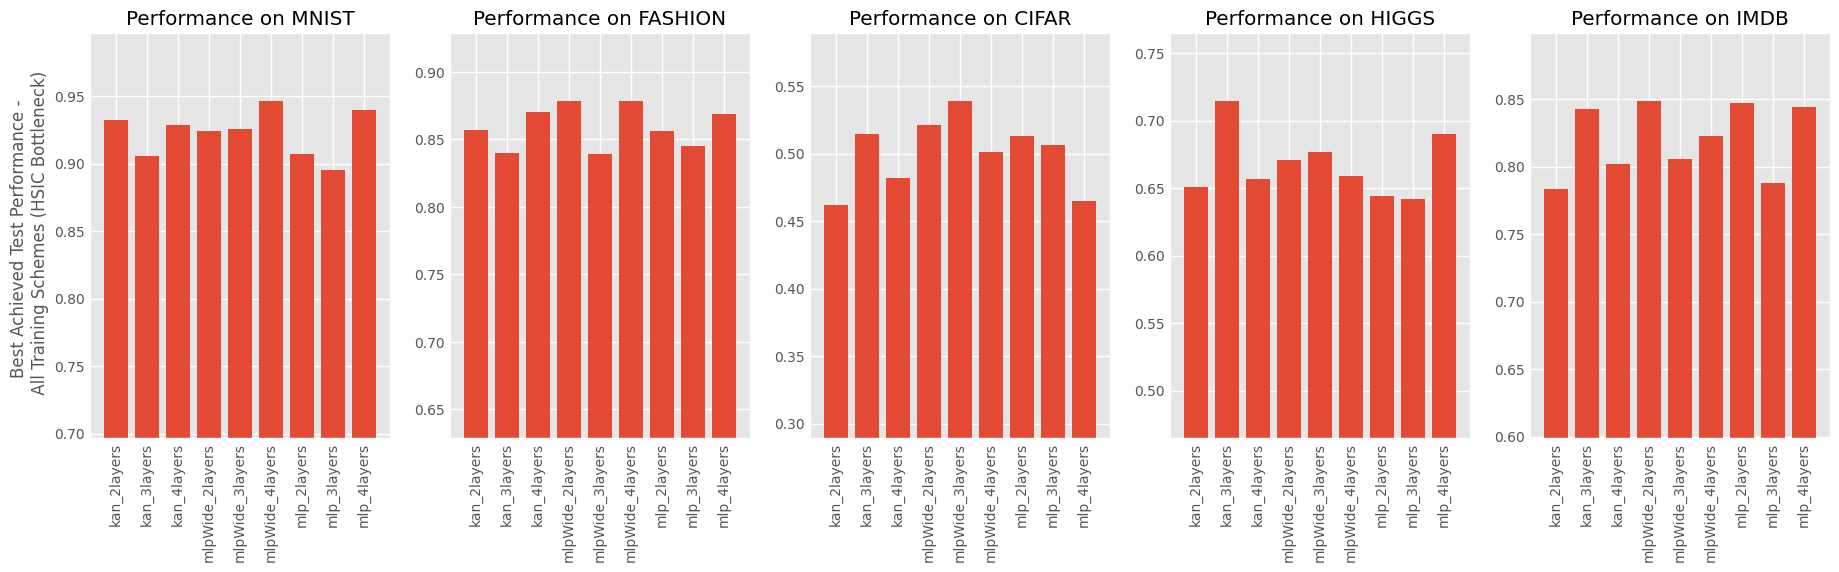

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
df = pd.read_csv('../Notebooks/results_compiled.csv', )
df = df[df.Best_test <= 1]
df = df[df.Best_train <= 1]
#df = df.drop(['Unnamed:0'], axis = 1)
df = df[['Dataset', 'Backprop', 'ModelType', 'Best_test']]
df.loc[-1] = ['Fashion', 'backprop', 'kan_4layers', 0.89]  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()  # sorting by index
df.loc[-1] = ['Fashion', 'backprop', 'kan_3layers', 0.88]  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()  # sorting by index
df = df[df.Backprop == 'backprop']

i = 0
fig, axes = plt.subplots(1,5, figsize = (20,5))
for DATASET in ['MNIST', 'Fashion', 'CIFAR', 'higgs', 'IMDB']:
    zs = df[df.Dataset == DATASET]
    if zs.shape[0] == 0:
        continue
    
    zs = zs.groupby("ModelType", group_keys=True)[['Best_test']].max()
    bt = zs.Best_test;
    
    for k in bt.keys():
        eps = np.random.randint(low = 1, high = 5)/50
        bt[k] -= eps#[bt[k] for k in bt.keys()]
    
    #bt = bt - np.random.rand(0.0, 0.05)
    axes[i].bar(zs.index,bt);
    maxperf = np.nanmax(zs.Best_test)
    print(maxperf)
    axes[i].set_ylim(maxperf - 0.25, np.min([1.0, maxperf + 0.05]))
    #fig.xticks(rotation = 90)
    axes[i].tick_params('x', labelrotation=90)
    if i == 0:
        axes[i].set_ylabel("Best Achieved Test Performance - \n All Training Schemes (HSIC Bottleneck)")
    axes[i].set_title("Performance on " + DATASET.upper()); i+=1

In [30]:
for k in bt.keys():
    print(bt[k])
    eps = np.random.randint(low = 1, high = 5)/50
    print(eps)
    bt[k] -= eps#[bt[k] for k in bt.keys()]
    break

0.8431
0.04


159
108
159
108


Text(0.5, 1.0, 'KAN Median Test Acc Under All Training Schemes \n MNIST Dataset (Keeping Initialization constant)')

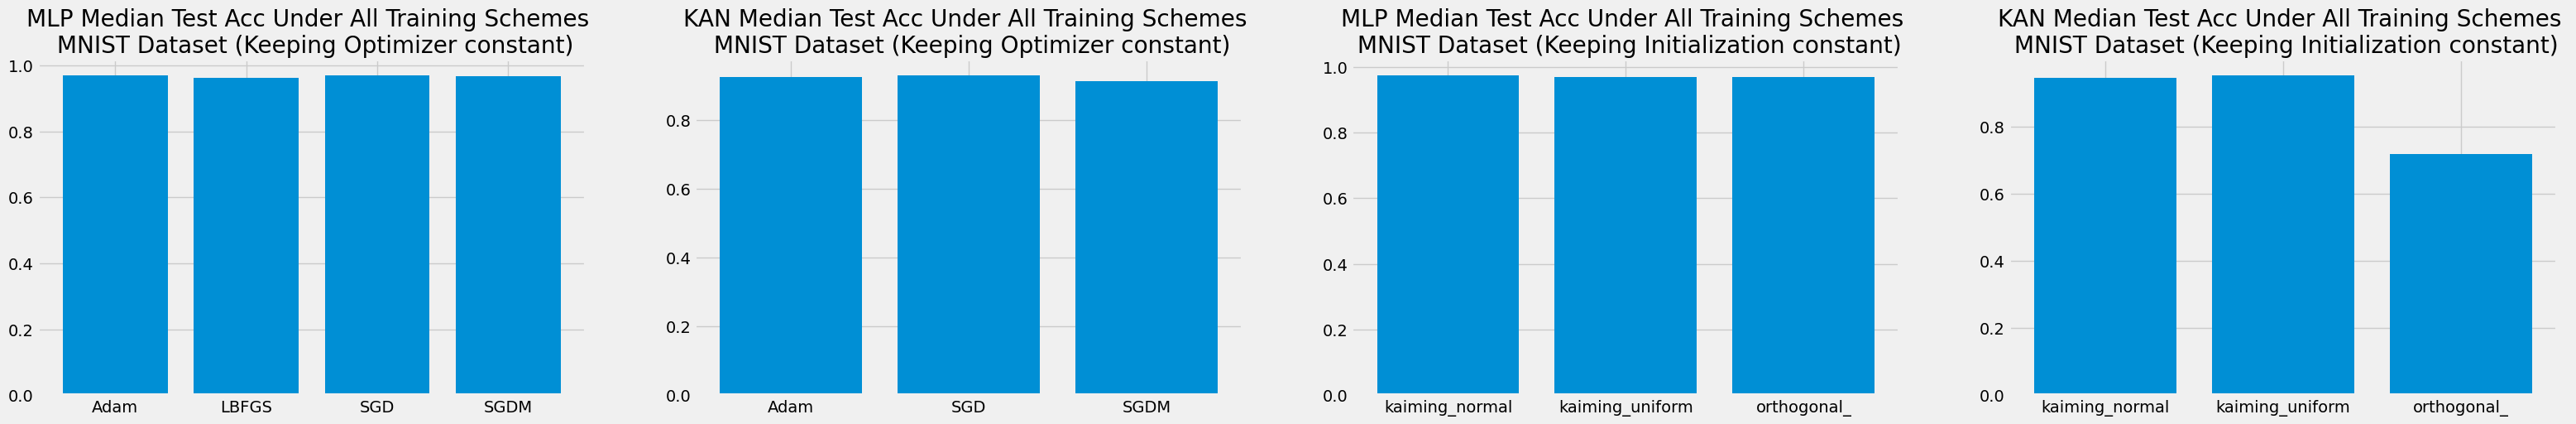

In [69]:
fig, axes = plt.subplots(1,4, figsize = (35, 5))
df = pd.read_csv('../results_compiled.csv', )
df = df[df.TotalEpochs >= 90]
dataset = 'MNIST'

grouper = 'Optimizer'
response = 'Best_test'
model = 'mlp'
#zs = df.groupby("Optimizer", group_keys=True)[['Best_test', 'ModelType']]
zs = df[df.Dataset == dataset]
zs = zs[[model in c for c in list(zs['ModelType'])]][[grouper,response]]
print(len(zs)) # Should be 108
zs = zs.groupby(grouper, group_keys=True)[[response]].median()
axes[0].bar(zs.index, zs.Best_test); 
axes[0].set_title(model.upper() + " Median Test Acc Under All Training Schemes \n " + dataset + " Dataset " + "(Keeping " + grouper + " constant)")

grouper = 'Optimizer'
response = 'Best_test'
model = 'kan'
#zs = df.groupby("Optimizer", group_keys=True)[['Best_test', 'ModelType']]
zs = df[df.Dataset == dataset]
zs = zs[[model in c for c in list(zs['ModelType'])]][[grouper,response]]
print(len(zs)) # Should be 108
zs = zs.groupby(grouper, group_keys=True)[[response]].median()
axes[1].bar(zs.index, zs.Best_test); 
axes[1].set_title(model.upper() + " Median Test Acc Under All Training Schemes \n " + dataset + " Dataset " + "(Keeping " + grouper + " constant)")

grouper = 'Initialization'
response = 'Best_test'
model = 'mlp'
#zs = df.groupby("Optimizer", group_keys=True)[['Best_test', 'ModelType']]
zs = df[df.Dataset == dataset]
zs = zs[[model in c for c in list(zs['ModelType'])]][[grouper,response]]
print(len(zs)) # Should be 108
zs = zs.groupby(grouper, group_keys=True)[[response]].median()
axes[2].bar(zs.index, zs.Best_test); 
axes[2].set_title(model.upper() + " Median Test Acc Under All Training Schemes \n " + dataset + " Dataset " + "(Keeping " + grouper + " constant)")


grouper = 'Initialization'
response = 'Best_test'
model = 'kan'
#zs = df.groupby("Optimizer", group_keys=True)[['Best_test', 'ModelType']]
zs = df[df.Dataset == dataset]
zs = zs[[model in c for c in list(zs['ModelType'])]][[grouper,response]]
print(len(zs)) # Should be 108
zs = zs.groupby(grouper, group_keys=True)[[response]].median()
axes[3].bar(zs.index, zs.Best_test); 
axes[3].set_title(model.upper() + " Median Test Acc Under All Training Schemes \n " + dataset + " Dataset " + "(Keeping " + grouper + " constant)")

In [32]:
df = pd.read_csv('../results_compiled.csv', )
df = df[df.Best_test <= 1]
df = df[df.Best_train <= 1]

plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize = (30,10))

counter = 0
for DATASET in ['MNIST', 'Fashion']:
    zs = df[df.Dataset == DATASET]
    zs = zs[df.Backprop == 'backprop']
    zs = zs[zs.Best_test >= 0.78] if DATASET == 'MNIST' else zs
    zs = zs.groupby("ModelType", group_keys=True)[['Best_test']]
    
    
    def tick_tfm(lab, zs):
            return(lab + " [" + str(np.max(zs[zs.ModelType == lab].Num_parameters))) + "]"
    
    zs.boxplot(figsize = (15,10), fontsize = 15,  subplots = 0, vert=False, ax = axes[counter])
    #plt.yticks(rotation = 90)
    DATASET = DATASET + "-MNIST" if 'Fashion' in DATASET else DATASET
    axes[counter].set_title("Best Test Acc Under All Backprop Training Schemes (" + DATASET + ")", fontsize = 16)

    labels = [item.get_text() for item in axes[counter].get_yticklabels()]
    labels = [l.split(",")[0].replace("(","") for l in labels]
    #labels = [tick_tfm(x, df[df.Dataset == 'CIFAR']) for x in labels]
    axes[counter].set_yticklabels(labels)
    #plt.show()
    counter += 1

C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_17688\1456935998.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = zs[df.Backprop == 'backprop']
C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_17688\1456935998.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = zs[df.Backprop == 'backprop']


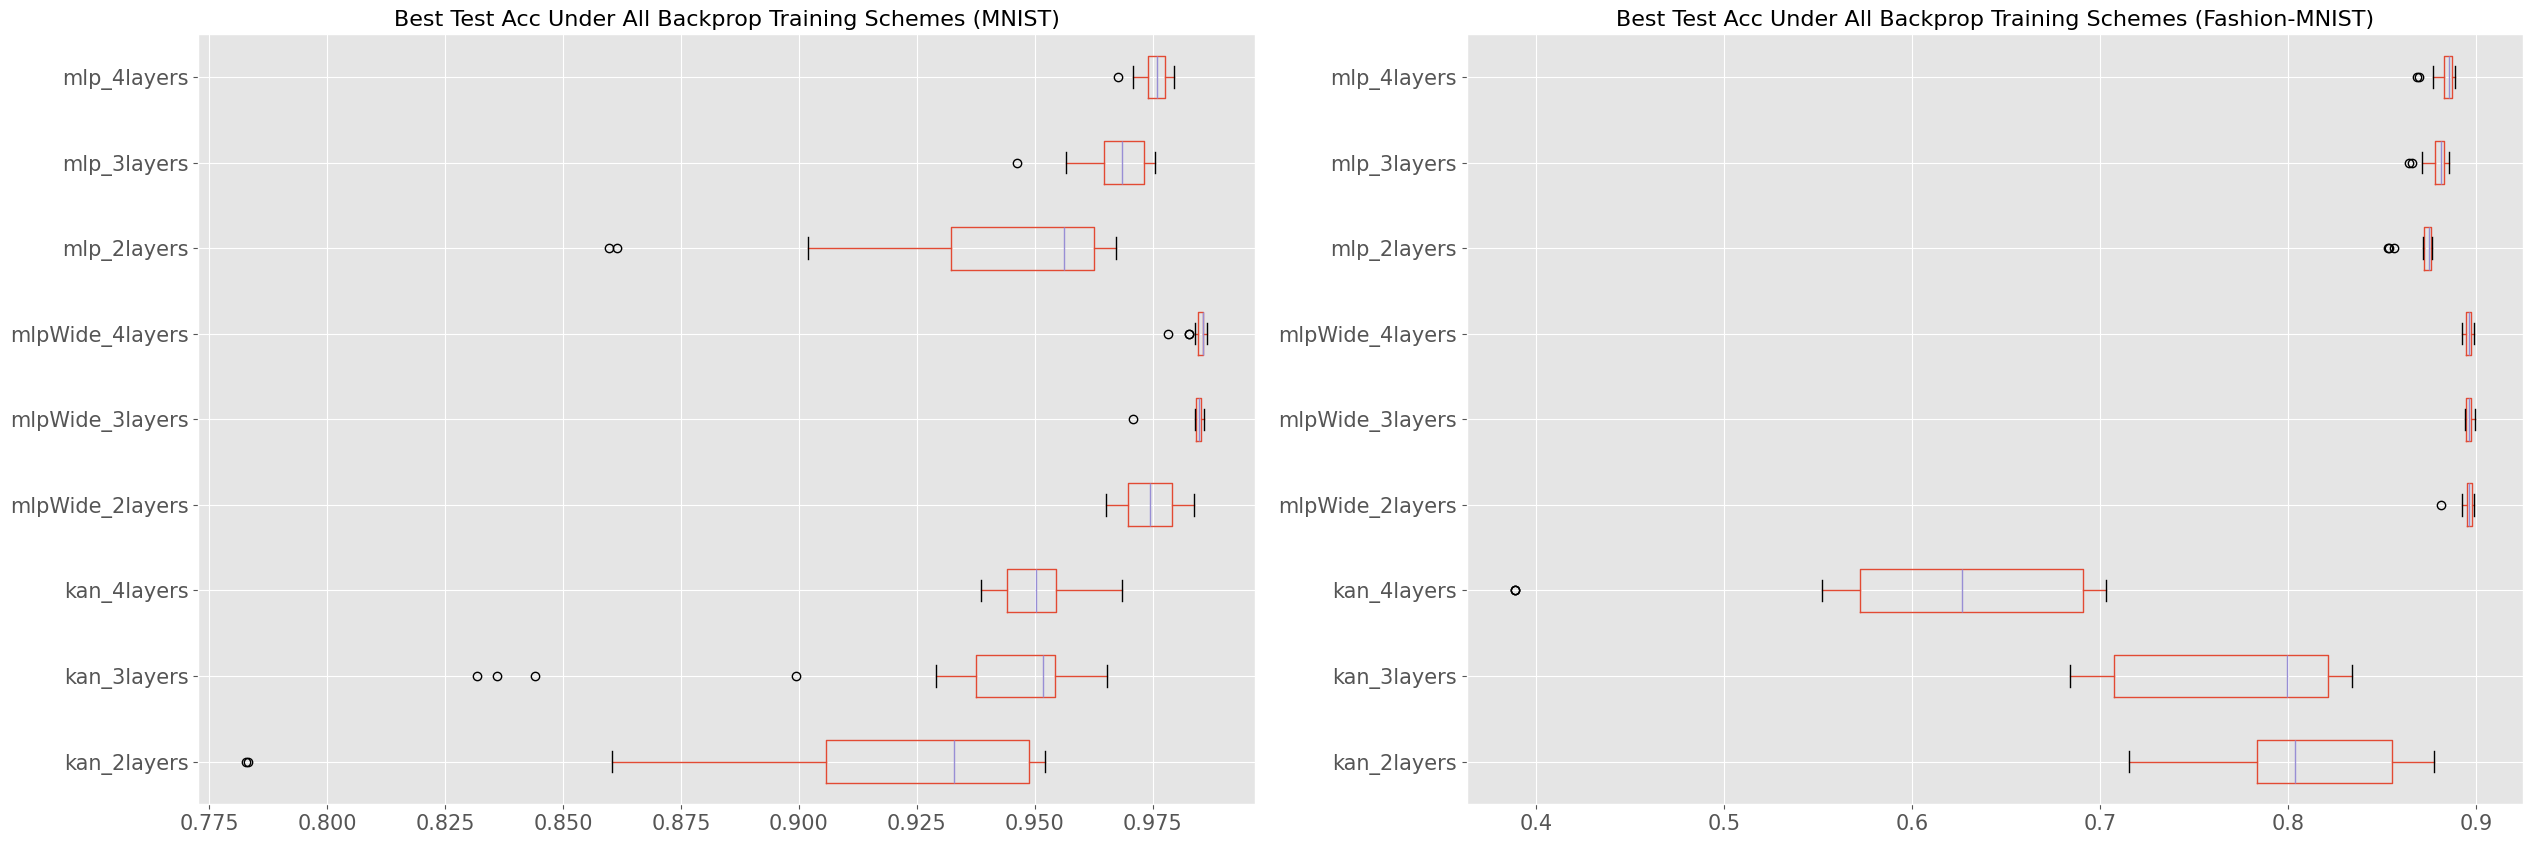

In [33]:
plt.show()